In [1]:
%matplotlib inline
from pyluos import Robot
from IPython.display import clear_output
import time
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

# Connect your Luos network (here using an USB module)
r = Robot('/dev/cu.usbserial-DN05NM0L')
r.modules
module = r.disk_top

# Update a the module data
module.encoder_res = 5
module.reduction = 214.0
module.wheel_size = 61.85

module.setToZero()


def run_speed_test(velocity_target):
    print("Speed test")
    module.rot_position = False
    module.rot_speed = True
    module.rot_position_mode(False)
    module.rot_speed_mode(True)
    module.target_rot_speed = 0.0
    module.compliant = False
    target = []
    real = []
    test_time_vector = []
    test_start_time = time.time()
    target.append(module.target_rot_speed)
    real.append(module.rot_speed)
    test_time = time.time()
    test_time_vector.append(0.0)
    while (test_time < test_start_time + 0.5):
        target.append(module.target_rot_speed)
        real.append(module.rot_speed)
        test_time_vector.append(test_time - test_start_time)
        test_time = time.time()
    module.target_rot_speed = velocity_target
    while (test_time < test_start_time + 2.5):
        target.append(module.target_rot_speed)
        real.append(module.rot_speed)
        test_time_vector.append(test_time - test_start_time)
        test_time = time.time()
    module.compliant = True
    plot_test(test_time_vector, target, real)

def run_pos_test(pos_target):
    print("Speed test")
    module.rot_speed = False
    module.rot_position = True
    module.rot_speed_mode(False)
    module.rot_position_mode(True)
    module.target_rot_position = 0.0
    module.compliant = False
    target = []
    real = []
    test_time_vector = []
    test_start_time = time.time()
    target.append(module.target_rot_position)
    real.append(module.rot_position)
    test_time = time.time()
    test_time_vector.append(0.0)
    while (test_time < test_start_time + 1):
        target.append(module.target_rot_position)
        real.append(module.rot_position)
        test_time_vector.append(test_time - test_start_time)
        test_time = time.time()
    module.target_rot_position = pos_target
    while (test_time < test_start_time + 2.5):
        target.append(module.target_rot_position)
        real.append(module.rot_position)
        test_time_vector.append(test_time - test_start_time)
        test_time = time.time()
    module.compliant = True
    plot_test(test_time_vector, target, real)

def plot_test(test_time_vector, target, real):
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(test_time_vector,target,'r')
    ax.plot(test_time_vector,real,'b')
    plt.show()
    plt.close(fig)

Connected to "/dev/cu.usbserial-DN05NM0L".
Sending detection signal.
Waiting for route table...
Robot setup.


In [ ]:
# Speed settings
module.speedPid = [0.8,0.1,1] # speed PID [P, I, D]

run_speed_test(100.0)


Speed test


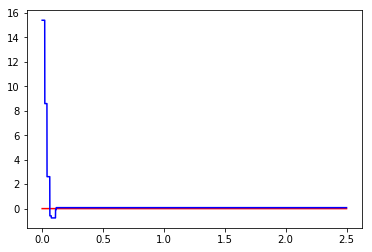

In [10]:
# position settings
module.positionPid = [9,0.02,120] # position PID [P, I, D]
run_pos_test(0.0)

In [8]:
module.control()

interactive(children=(Checkbox(value=False, description='rot_speed_report'), Checkbox(value=True, description=…